## <center> Nearest Neighbour Algorithm </center>

    First block contains the required import statements to implement Nearest Neighbour Algorithm

In [1]:
import numpy as np
from collections import Counter
from sklearn import datasets
from sklearn.model_selection import train_test_split

    Loading the data from iris dataset. (Note: random_state being assigned a value based on the DOB)

In [2]:
iris = datasets.load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1410)

In [3]:
def euclidean_distance(X, y):
        sum_sq = np.sum(np.square(X - y))
        return np.sqrt(sum_sq)

    As the name suggest, the function "euclidean_distance(X,y)" is used to compute the nearest distance between two points.

    I have implemented a class NN which holds all the functions for executing 1NN algorithm

In [4]:
class NN:
    
    def fit(X, y):
        X_train = X
        y_train = y

    def predict(X_test):
        output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = euclidean_distance(X_train[j] , X_test[i])
                d.append([dist, j])
            sorted_d = sorted(d)
            sorted_d = sorted_d[0:1]
            for sorted_d, j in sorted_d:
                votes.append(y_train[j])
            ans = Counter(votes).most_common(1)[0][0]
            output.append(ans)
        return output

    The predict method returns the predicted label value for the testing set by utilising the euclidean distance function.

In [5]:
iris_nn = NN
iris_nn.fit(X_train, y_train)
prediction = iris_nn.predict(X_test)
for i in prediction:
    print(i, end = ", ")

1, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 1, 2, 1, 2, 0, 2, 

    I have created an object for iris dataset called 'iris_nn' for the class NN to invoke the methods within it.

In [6]:
def no_Of_Error(prediction,y_test):
    error_count = 0
    for i in range(len(prediction)):
        if prediction[i] != y_test[i]:
            error_count = error_count+1
    return error_count

The above method ***no_Of_Error(prediction,y_test)*** returns the number of wrong predictions made by the model

In [7]:
def error_rate(error_count,y_test):
    test_error_rate = error_count/len(y_test)
    return test_error_rate

***error_rate*** function is used to calculate the error rate ratio

In [8]:
error_count = no_Of_Error(prediction,y_test)
print("The number of errors occured with the test samples in iris dataset using 1NN is:",error_count)

The number of errors occured with the test samples in iris dataset using 1NN is: 3


In [9]:
print("The test error rate of iris dataset using 1NN is:",error_rate(error_count,y_test))

The test error rate of iris dataset using 1NN is: 0.07894736842105263


In [10]:
test_accuracy_rate = 1 - (error_count/len(y_test))
print("Test accuracy:",test_accuracy_rate)

Test accuracy: 0.9210526315789473


## <center> 3NN implementation for iris data</center>

In [11]:
class KNN:
    def __init__(self, k):
        self.k = k
        
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def predict(self, X_test):
        output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(X_train)):
                dist = euclidean_distance(X_train[j] , X_test[i])
                d.append([dist, j])    
            sorted_distance = sorted(d)
            sorted_distance = sorted_distance[0:self.k]
            for sorted_distance, j in sorted_distance:
                votes.append(y_train[j])
            temp = Counter(votes).most_common(1)[0][0]
            output.append(temp)
            
        return output
    
    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        return (predictions == y_test).sum() / len(y_test)

In [12]:
iris_3nn = KNN(3)
iris_3nn.fit(X_train, y_train)
prediction = iris_3nn.predict(X_test)
for i in prediction:
    print(i, end= ' ')

1 1 1 0 2 1 1 1 2 0 1 0 2 0 0 1 1 2 2 1 2 1 1 0 0 2 1 2 2 1 0 2 1 2 1 2 0 2 

In [13]:
def error_rate_3nn(error_count,y_test):
    test_error_rate = error_count/len(y_test)
    return test_error_rate

In [14]:
error_count_3nn = no_Of_Error(prediction,y_test)
print("The number of errors occured with the test samples in iris dataset using 3NN is:",error_count_3nn)

The number of errors occured with the test samples in iris dataset using 3NN is: 2


In [15]:
print("The test error rate of iris dataset using 3NN is:",error_rate_3nn(error_count_3nn,y_test))

The test error rate of iris dataset using 3NN is: 0.05263157894736842


In [16]:
test_accuracy_rate = 1 - (error_count_3nn/len(y_test))
test_accuracy_rate

0.9473684210526316

## <center>1NN for ionosphere.txt </center>

In [17]:
X = np.genfromtxt("ionosphere.txt", delimiter=",")
X[:3]

array([[ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306,
         0.83398, -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,
         0.59755, -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,
         0.58212, -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,
         0.56811, -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,
         0.42267, -0.54487,  0.18641, -0.453  ,  1.     ],
       [ 1.     ,  0.     ,  1.     , -0.18829,  0.93035, -0.36156,
        -0.10868, -0.93597,  1.     , -0.04549,  0.50874, -0.67743,
         0.34432, -0.69707, -0.51685, -0.97515,  0.05499, -0.62237,
         0.33109, -1.     , -0.13151, -0.453  , -0.18056, -0.35734,
        -0.20332, -0.26569, -0.20468, -0.18401, -0.1904 , -0.11593,
        -0.16626, -0.06288, -0.13738, -0.02447, -1.     ],
       [ 1.     ,  0.     ,  1.     , -0.03365,  1.     ,  0.00485,
         1.     , -0.12062,  0.88965,  0.01198,  0.73082,  0.05346,
         0.85443,  0.00827,  0.54591,  0.00299,  0.83775, -0.13644

In [18]:
y = np.genfromtxt("ionosphere.txt", delimiter=",", usecols=34, dtype='int')
y[:3]

array([ 1, -1,  1])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1410)

In [20]:
ionosphere_nn = NN
ionosphere_nn.fit(X_train, y_train)
prediction = ionosphere_nn.predict(X_test)
for i in prediction:
    print(i, end = ", ")

1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 

In [21]:
print("The number of errors occured with the test samples in ionosphere dataset using 1NN is:",no_Of_Error(prediction,y_test))

The number of errors occured with the test samples in ionosphere dataset using 1NN is: 16


In [22]:
print("The test error rate of ionosphere dataset using 1NN is:",error_rate(error_count,y_test))

The test error rate of ionosphere dataset using 1NN is: 0.03409090909090909


In [23]:
test_accuracy_rate = 1 - (error_count/len(y_test))
test_accuracy_rate

0.9659090909090909

## <center> 3NN for ionosphere.txt</center>

In [24]:
ionosphere_3nn = KNN(3)
ionosphere_3nn.fit(X_train, y_train)
prediction = ionosphere_3nn.predict(X_test)
for i in prediction:
    print(i, end= ' ')

1 -1 1 1 -1 1 1 -1 1 1 -1 1 1 -1 -1 1 -1 1 -1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 -1 

In [25]:
error_count_3nn = no_Of_Error(prediction,y_test)
print("The number of errors occured with the test samples in ionosphere dataset using 3NN is:",error_count_3nn)

The number of errors occured with the test samples in ionosphere dataset using 3NN is: 17


In [26]:
print("The test error rate of ionosphere dataset using 3NN is:",error_rate_3nn(error_count_3nn,y_test))

The test error rate of ionosphere dataset using 3NN is: 0.19318181818181818


In [27]:
test_accuracy_rate = 1 - (error_count_3nn/len(y_test))
test_accuracy_rate

0.8068181818181819

## <center> KNN general implementation </center>

    Now Let's implement the knn for a range of values (say k = 1:30)

In [28]:
error = []
for i in range(1, 30):
    ionosphere_knn = KNN(i)
    ionosphere_knn.fit(X_train, y_train)
    prediction = ionosphere_knn.predict(X_test)
    error_count_knn = no_Of_Error(prediction,y_test)
    error_rate = error_rate_3nn(error_count_knn,y_test)
    error.append(np.mean(error_rate))
    print("\nk =",i,"\nprediction =",prediction)
    


k = 1 
prediction = [1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1]

k = 2 
prediction = [1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1]

k = 3 
prediction = [1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1]

k = 4 
prediction = [1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1]

k = 5 
prediction = [1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1]

k = 6 
prediction = [1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1]

k = 7 
prediction = [1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

    The above cell takes in the range of values for k, predicts the label for test set and gets the mean error rate for each value of k.

     Lets plot a graph for the error rate with respect to the value of k 

Text(0, 0.5, 'Mean Error')

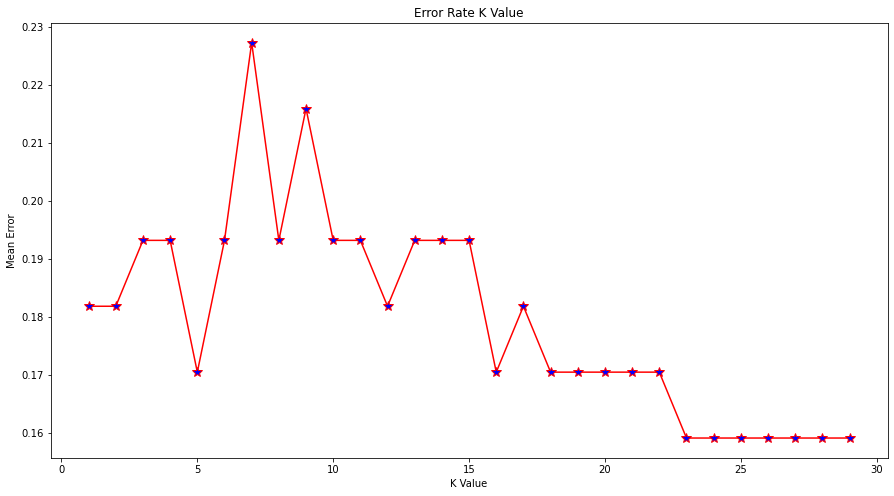

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.plot(range(1,30), error, color='red', marker='*', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the mean error rate k value graph, it is observed that the value of k determines the effeciency of the model. Choosing the value of k is a key phenomenon in knn algorithm. Even though for the value of 23, the lowest error rate is computed, it takes much time to implement and arrive at a solution. So the increase in k value is directly proportional to the computational power. 
    
    From the above graph, we can infer that the value of k = 5 gives the optimal error rate with miminal computational power.

To summarise the Assignment: 

    The number of errors occured with the test samples in
        1. The iris dataset using 1NN is: 3
        2. The iris dataset using 3NN is: 2
        3. The ionosphere dataset using 1NN is: 16
        4. The ionosphere dataset using 3NN is: 17

and 
    
    The test error rate of
        1. iris dataset using 1NN is: 0.07894736842105263
        2. iris dataset using 3NN is: 0.05263157894736842
        3. ionosphere dataset using 1NN is: 0.03409090909090909
        4. ionosphere dataset using 3NN is: 0.19318181818181818